In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst
import statsmodels.api as sm
import lightgbm as lgb

%config InlineBackend.figure_format = 'retina' # plot 해상도 업

In [2]:
train_row = pd.read_csv('train_dataset.csv')

In [3]:
test_row = pd.read_csv('test_dataset_v01.csv')

In [4]:
print(train_row.shape)
print(test_row.shape)

(3664, 25)
(2441, 24)


In [5]:
train_row.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [7]:
test_row.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,0,97,0,80.0,17.0,17.0,4,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,1,37,0,22.0,15.0,15.0,3,1,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,2,44,0,NaN,20.0,20.0,3,3,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,3,40,0,14.0,26.0,26.0,2,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,4,43,2,NaN,26.0,26.0,2,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0


In [7]:
train = train_row.copy()
test = test_row.copy()

### 데이터 전처리

In [8]:
train.drop(columns='Unnamed: 0',axis=1, inplace=True)
train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [9]:
test.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [10]:
test

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,97,0,80.0,17.0,17.0,4,0,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,37,0,22.0,15.0,15.0,3,1,0,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,44,0,NaN,20.0,20.0,3,3,0,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,40,0,14.0,26.0,26.0,2,0,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,43,2,NaN,26.0,26.0,2,0,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,63,0,NaN,17.0,NaN,4,2,0,0,0,...,1,18.0,0,0,79,1,1,1.0,119.0,0
2437,36,0,1.0,35.0,35.0,2,0,0,0,0,...,0,27.0,0,0,57,1,1,1.0,NaN,0
2438,45,1,23.0,22.0,NaN,2,0,0,0,0,...,0,8.0,0,0,199,1,1,2.0,NaN,0
2439,24,0,10.0,14.0,NaN,3,0,0,0,1,...,0,3.0,0,0,90,1,1,2.0,25.0,0


In [11]:
# target (정상, 불량) > (0,1) 로 변환
train.replace({'Result_v1':'malicious'}, 0, inplace=True)
train.replace({'Result_v1':'benign'}, 1, inplace=True)

In [13]:
train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1


### 결측치 파악 

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [15]:
train.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [16]:
test.isna().sum()

url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_domain_len             466
url_hostname_len           463
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_chinese_present          0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
html_num_tags('applet')      0
dtype: int64

In [17]:
train["html_num_tags('form')"].describe()

count    3664.000000
mean        1.028930
std         1.563903
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        57.000000
Name: html_num_tags('form'), dtype: float64

In [18]:
train.nunique()

url_len                     242
url_num_hyphens_dom           8
url_path_len                203
url_domain_len               67
url_hostname_len             67
url_num_dots                 17
url_num_underscores          13
url_query_len                78
url_num_query_para            9
url_ip_present                2
url_entropy                2524
url_chinese_present           1
url_port                      2
html_num_tags('iframe')      14
html_num_tags('script')      78
html_num_tags('embed')        3
html_num_tags('object')       7
html_num_tags('div')        302
html_num_tags('head')         4
html_num_tags('body')         4
html_num_tags('form')        14
html_num_tags('a')          300
html_num_tags('applet')       1
Result_v1                     2
dtype: int64

In [19]:
test.nunique()

url_len                     203
url_num_hyphens_dom           7
url_path_len                157
url_domain_len               56
url_hostname_len             57
url_num_dots                 16
url_num_underscores          16
url_query_len                57
url_num_query_para            9
url_ip_present                2
url_entropy                1791
url_chinese_present           1
url_port                      2
html_num_tags('iframe')       9
html_num_tags('script')      64
html_num_tags('embed')        4
html_num_tags('object')       6
html_num_tags('div')        256
html_num_tags('head')         4
html_num_tags('body')         4
html_num_tags('form')        10
html_num_tags('a')          240
html_num_tags('applet')       1
dtype: int64

[train] 각 feature에 한 개씩 결측치가 있음.
- url_path_len 1개
- url_domain_len 1개

[test] 많은 feature에 다중으로 결측치 분포
- 최빈값으로 대체할까

[train / test] Url_chinese_presen와 html_num_tags('applet')은 원
소의 개수가 한 개임. 
- 즉, 영향이 없는 변수임
- 이들을 제거해줄지 말지를 판별해야함 > 난 삭제할래

### 단변량 분석

- 정상과 불량에 대한 히스토그램 비교 (length 와 number)
- 모든 분포 그래프에서 최빈값의 차이가 많이 남.

In [20]:
train.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_chinese_present', 'url_port', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('embed')',
       'html_num_tags('object')', 'html_num_tags('div')',
       'html_num_tags('head')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'Result_v1'],
      dtype='object')

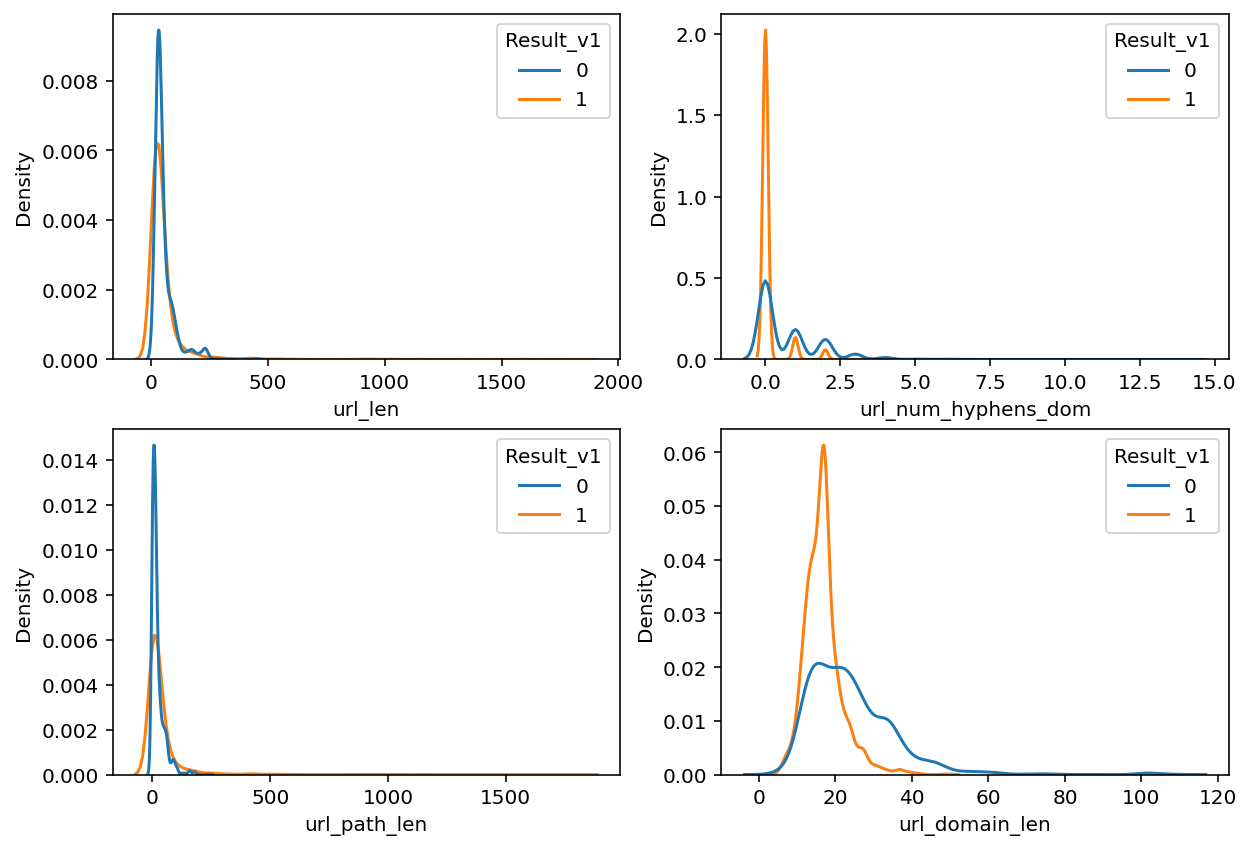

In [21]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.kdeplot(data=train, x='url_len', hue='Result_v1')

plt.subplot(2,2,2)
sns.kdeplot(data=train, x='url_num_hyphens_dom', hue='Result_v1')

plt.subplot(2,2,3)
sns.kdeplot(data=train, x='url_path_len', hue='Result_v1')

plt.subplot(2,2,4)
sns.kdeplot(data=train, x='url_domain_len', hue='Result_v1')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


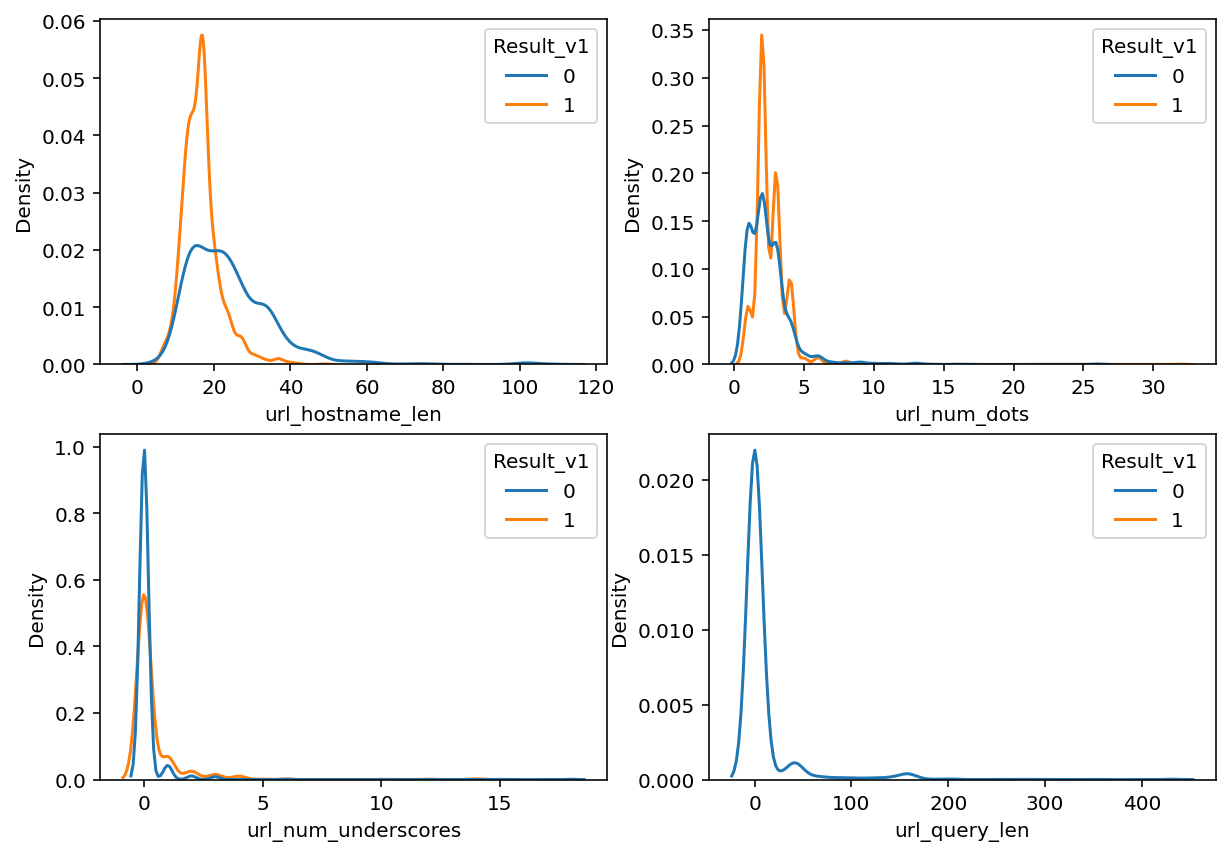

In [22]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.kdeplot(data=train, x='url_hostname_len', hue='Result_v1')

plt.subplot(2,2,2)
sns.kdeplot(data=train, x='url_num_dots', hue='Result_v1')

plt.subplot(2,2,3)
sns.kdeplot(data=train, x='url_num_underscores', hue='Result_v1')

plt.subplot(2,2,4)
sns.kdeplot(data=train, x='url_query_len', hue='Result_v1')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


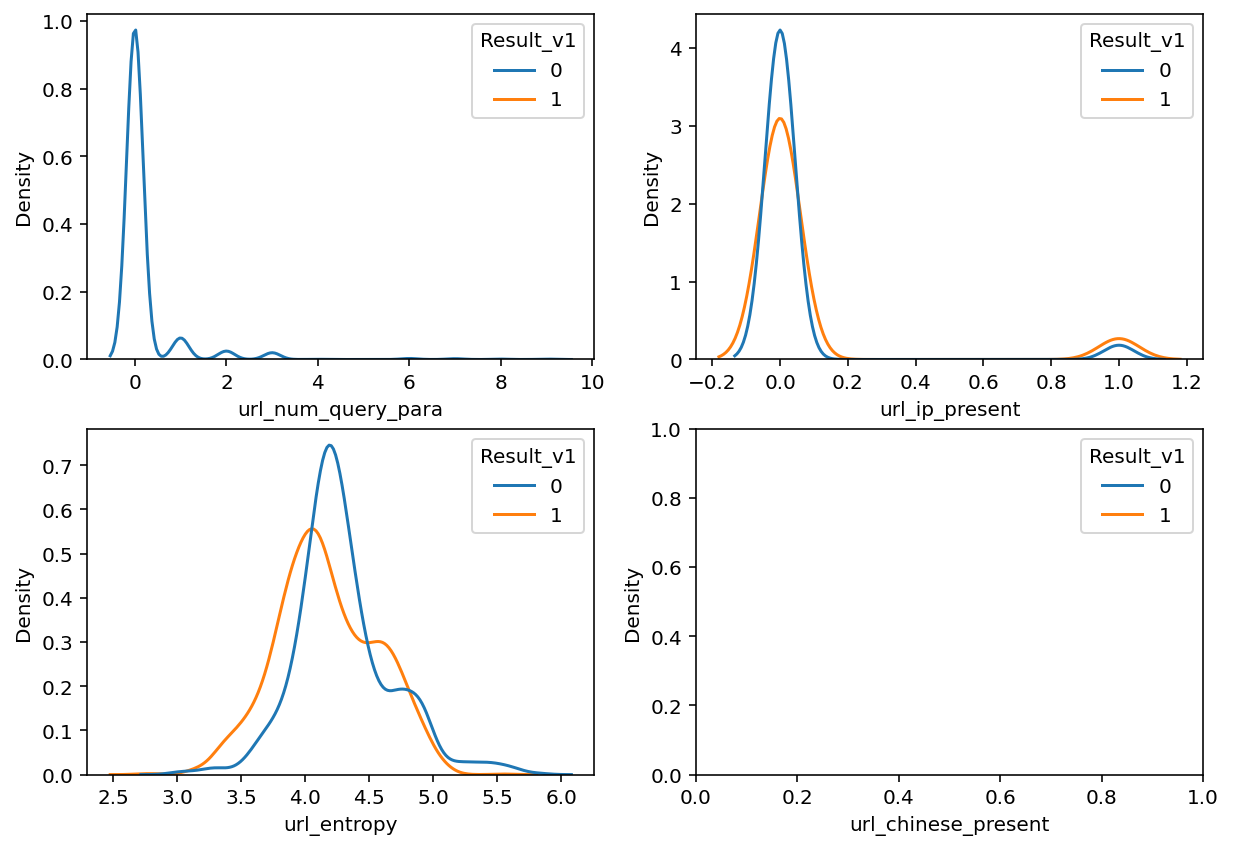

In [23]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.kdeplot(data=train, x='url_num_query_para', hue='Result_v1')

plt.subplot(2,2,2)
sns.kdeplot(data=train, x='url_ip_present', hue='Result_v1')

plt.subplot(2,2,3)
sns.kdeplot(data=train, x='url_entropy', hue='Result_v1')

plt.subplot(2,2,4)
sns.kdeplot(data=train, x='url_chinese_present', hue='Result_v1')
plt.show()

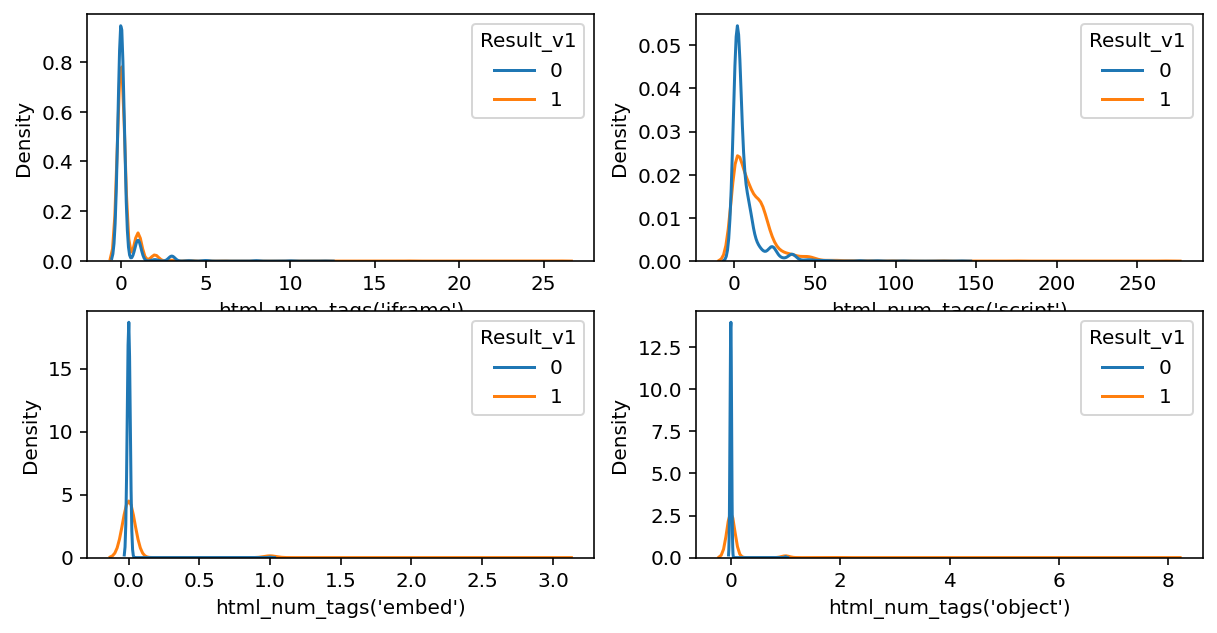

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.kdeplot(data=train, x="html_num_tags('iframe')",  hue='Result_v1')

plt.subplot(2,2,2)
sns.kdeplot(data=train, x= "html_num_tags('script')", hue='Result_v1')

plt.subplot(2,2,3)
sns.kdeplot(data=train, x= "html_num_tags('embed')",  hue='Result_v1')

plt.subplot(2,2,4)
sns.kdeplot(data=train, x= "html_num_tags('object')", hue='Result_v1')
plt.show()

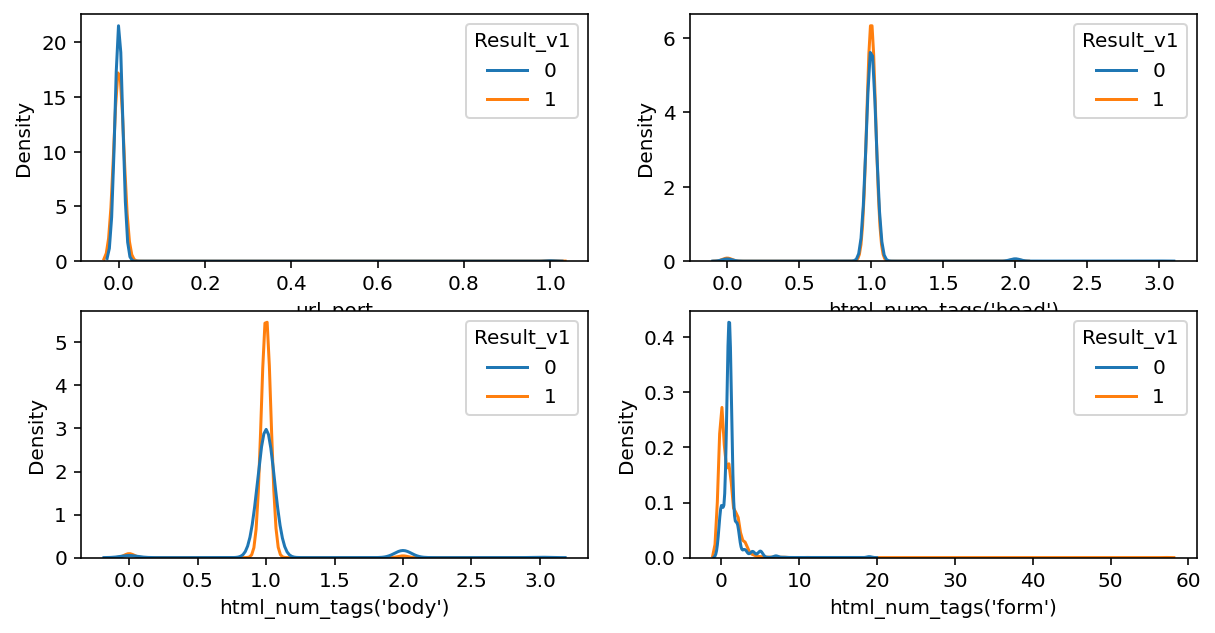

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.kdeplot(data=train, x='url_port',  hue='Result_v1')

plt.subplot(2,2,2)
sns.kdeplot(data=train, x="html_num_tags('head')", hue='Result_v1')

plt.subplot(2,2,3)
sns.kdeplot(data=train, x="html_num_tags('body')",  hue='Result_v1')

plt.subplot(2,2,4)
sns.kdeplot(data=train, x="html_num_tags('form')", hue='Result_v1')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


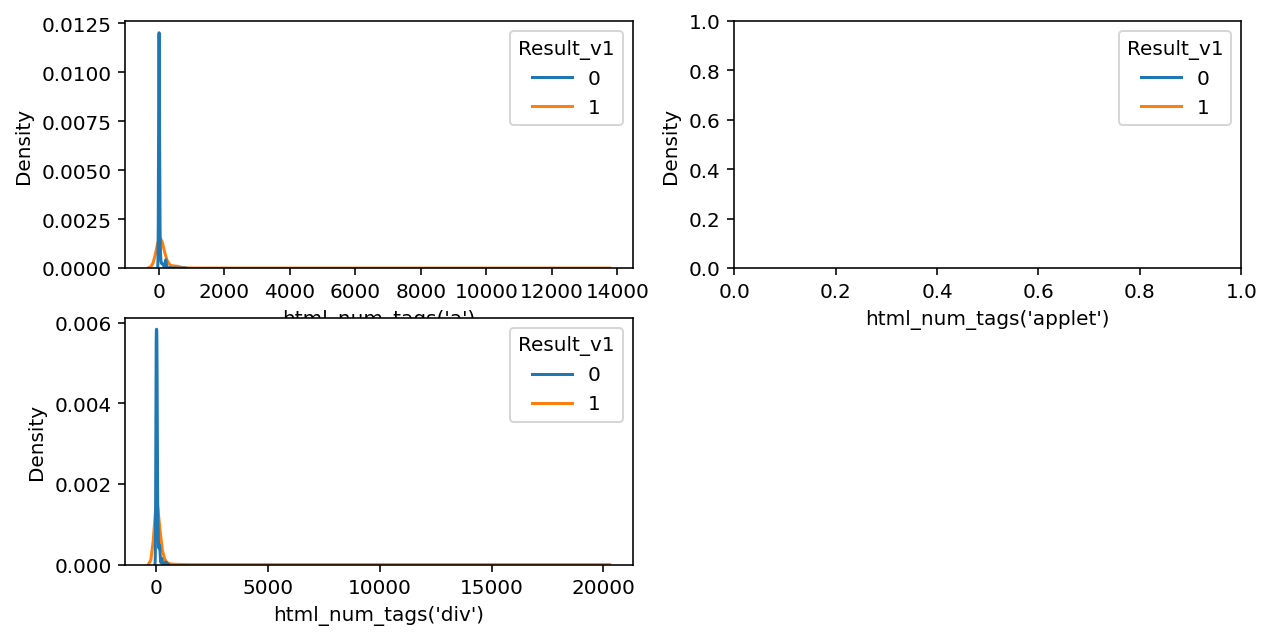

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.kdeplot(data=train, x="html_num_tags('a')",  hue='Result_v1')

plt.subplot(2,2,2)
sns.kdeplot(data=train, x="html_num_tags('applet')", hue='Result_v1')

plt.subplot(2,2,3)
sns.kdeplot(data=train, x="html_num_tags('div')",  hue='Result_v1')

plt.show()

## 이변량 분석

### 정상 데이터와 불량 데이터 간 분포 
1. 정상과 불량 간의 차이가 있는지? 
- 정상 데이터

In [27]:
train['Result_v1'].value_counts()

1    1858
0    1806
Name: Result_v1, dtype: int64

In [28]:
train_benign = train.loc[train['Result_v1']==1]
train_benign_corr = train_benign.corr()

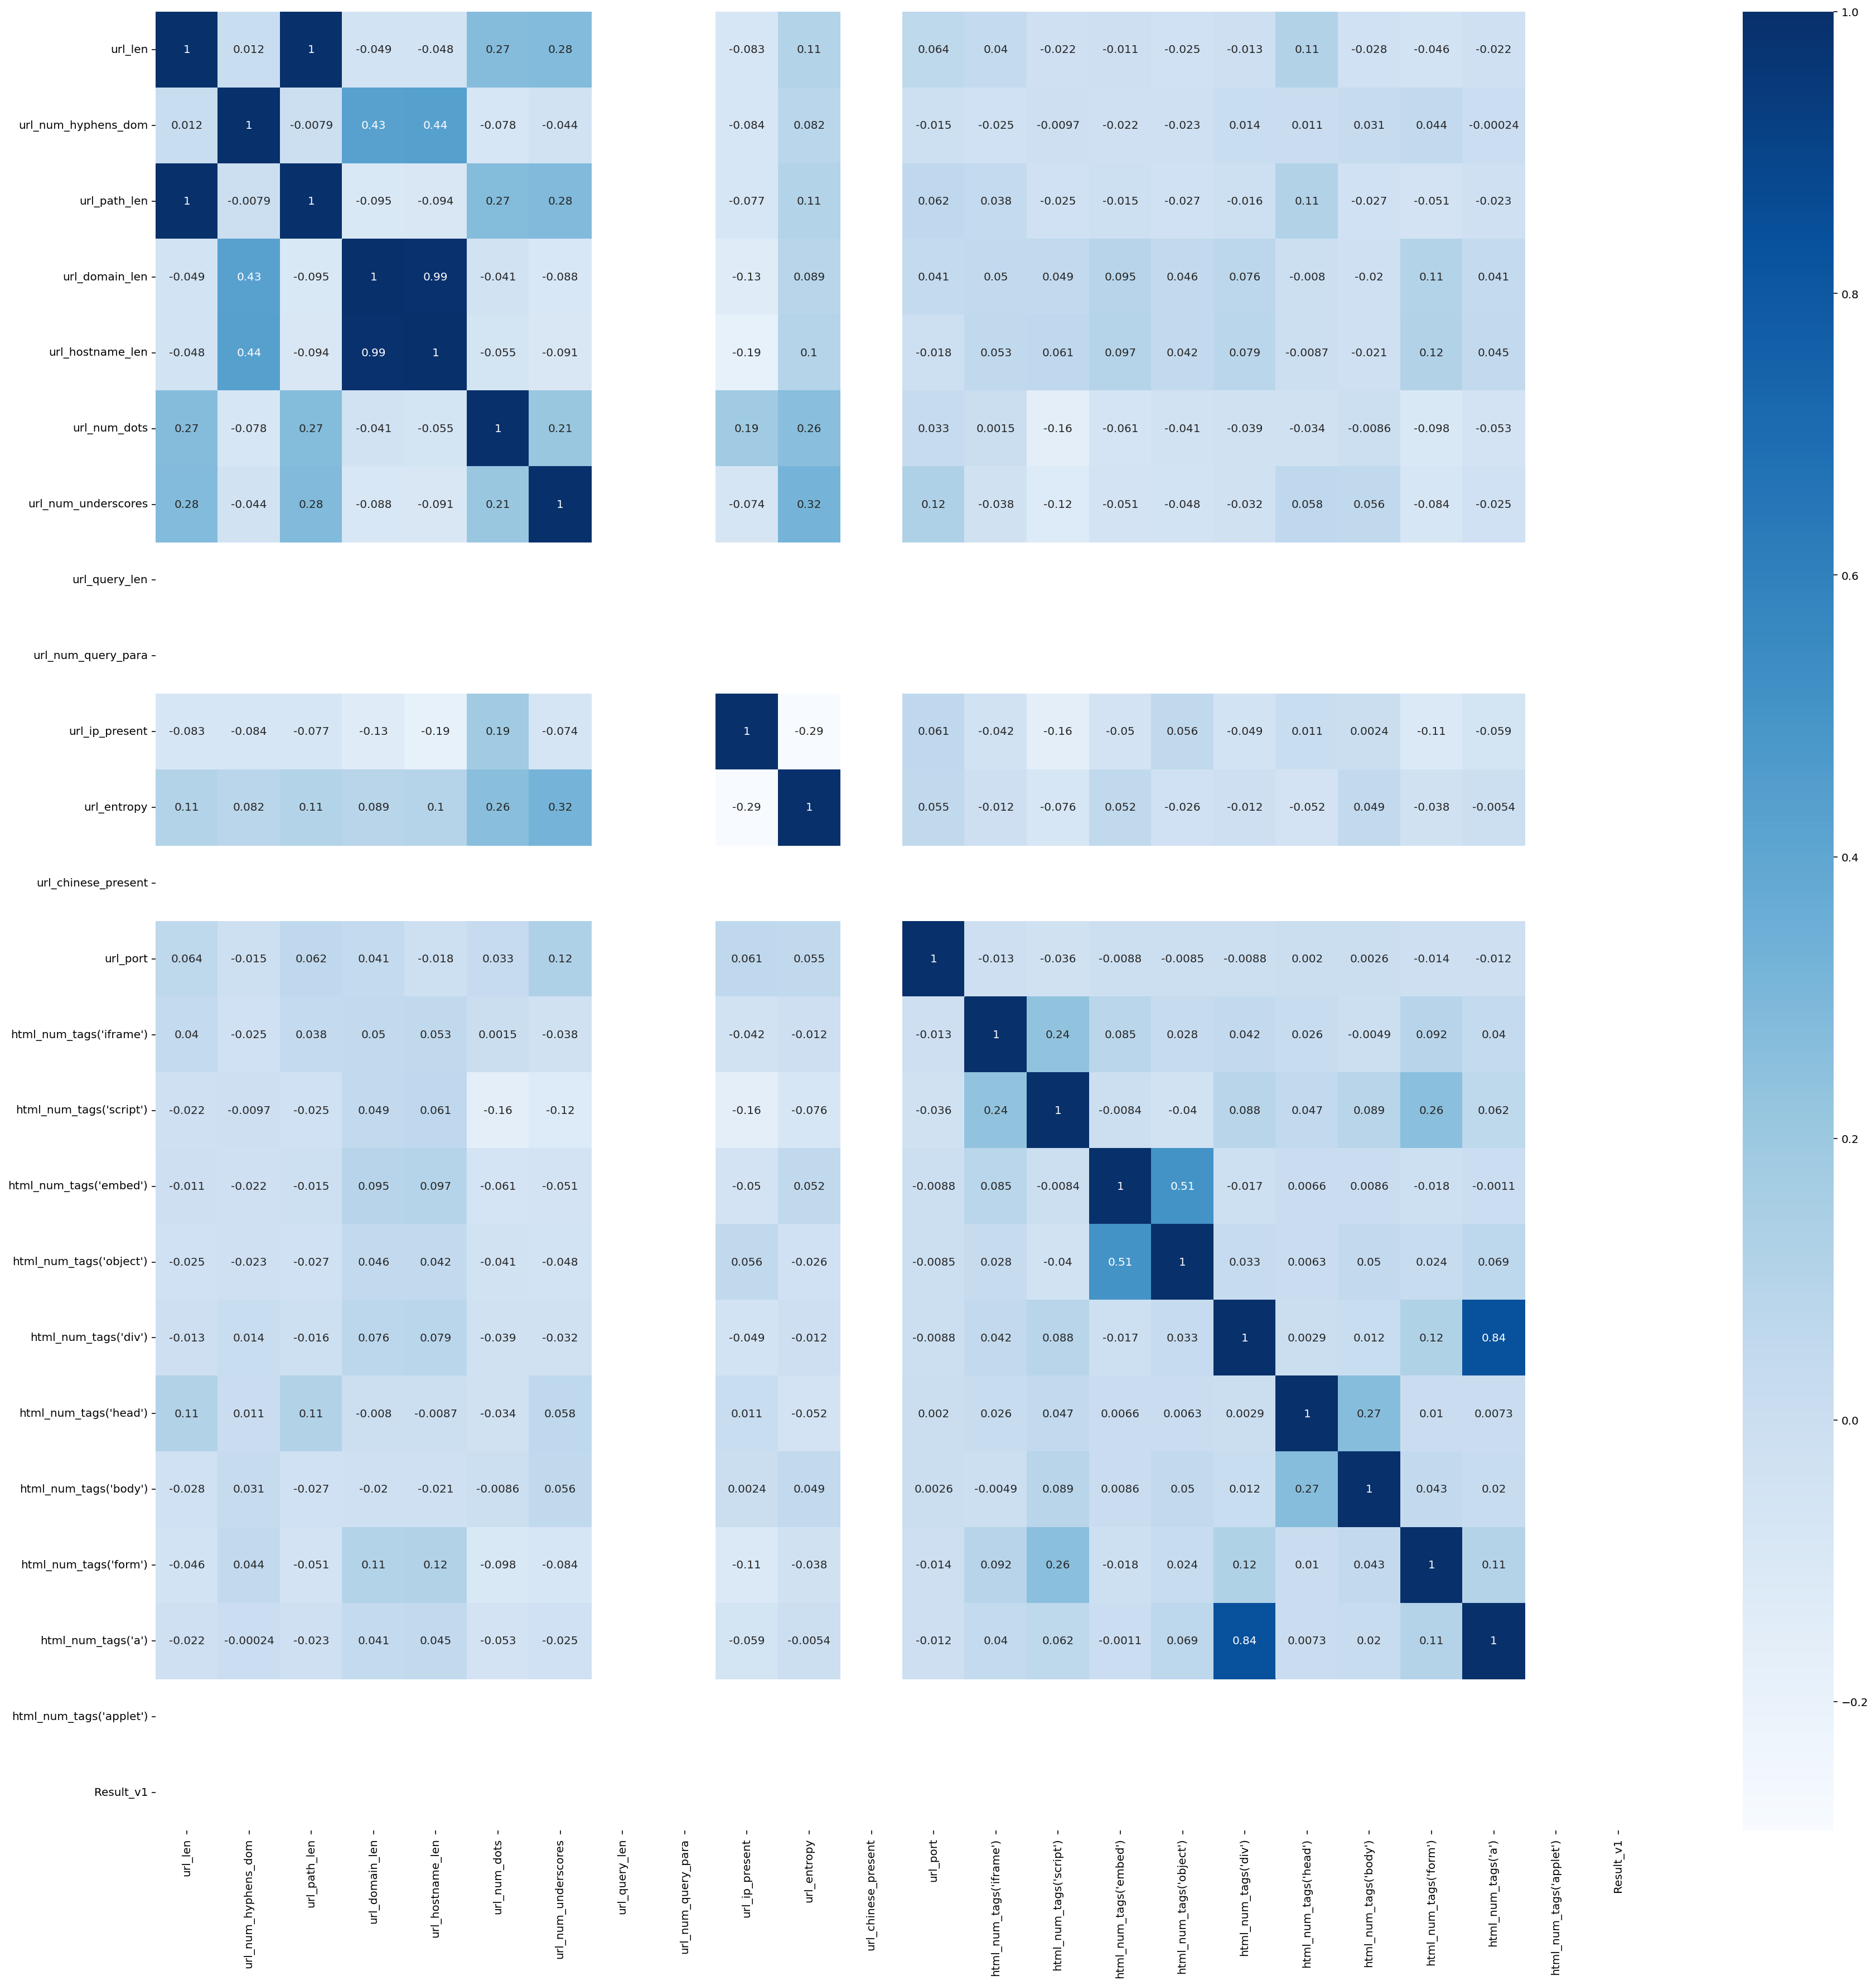

In [29]:
plt.figure(figsize=(30,30))
sns.heatmap(train_benign_corr, annot=True, cmap='Blues')
plt.show()

- 불량 데이터

In [30]:
train_malicious = train.loc[train['Result_v1']==0]
train_malicious_corr = train_malicious.corr()

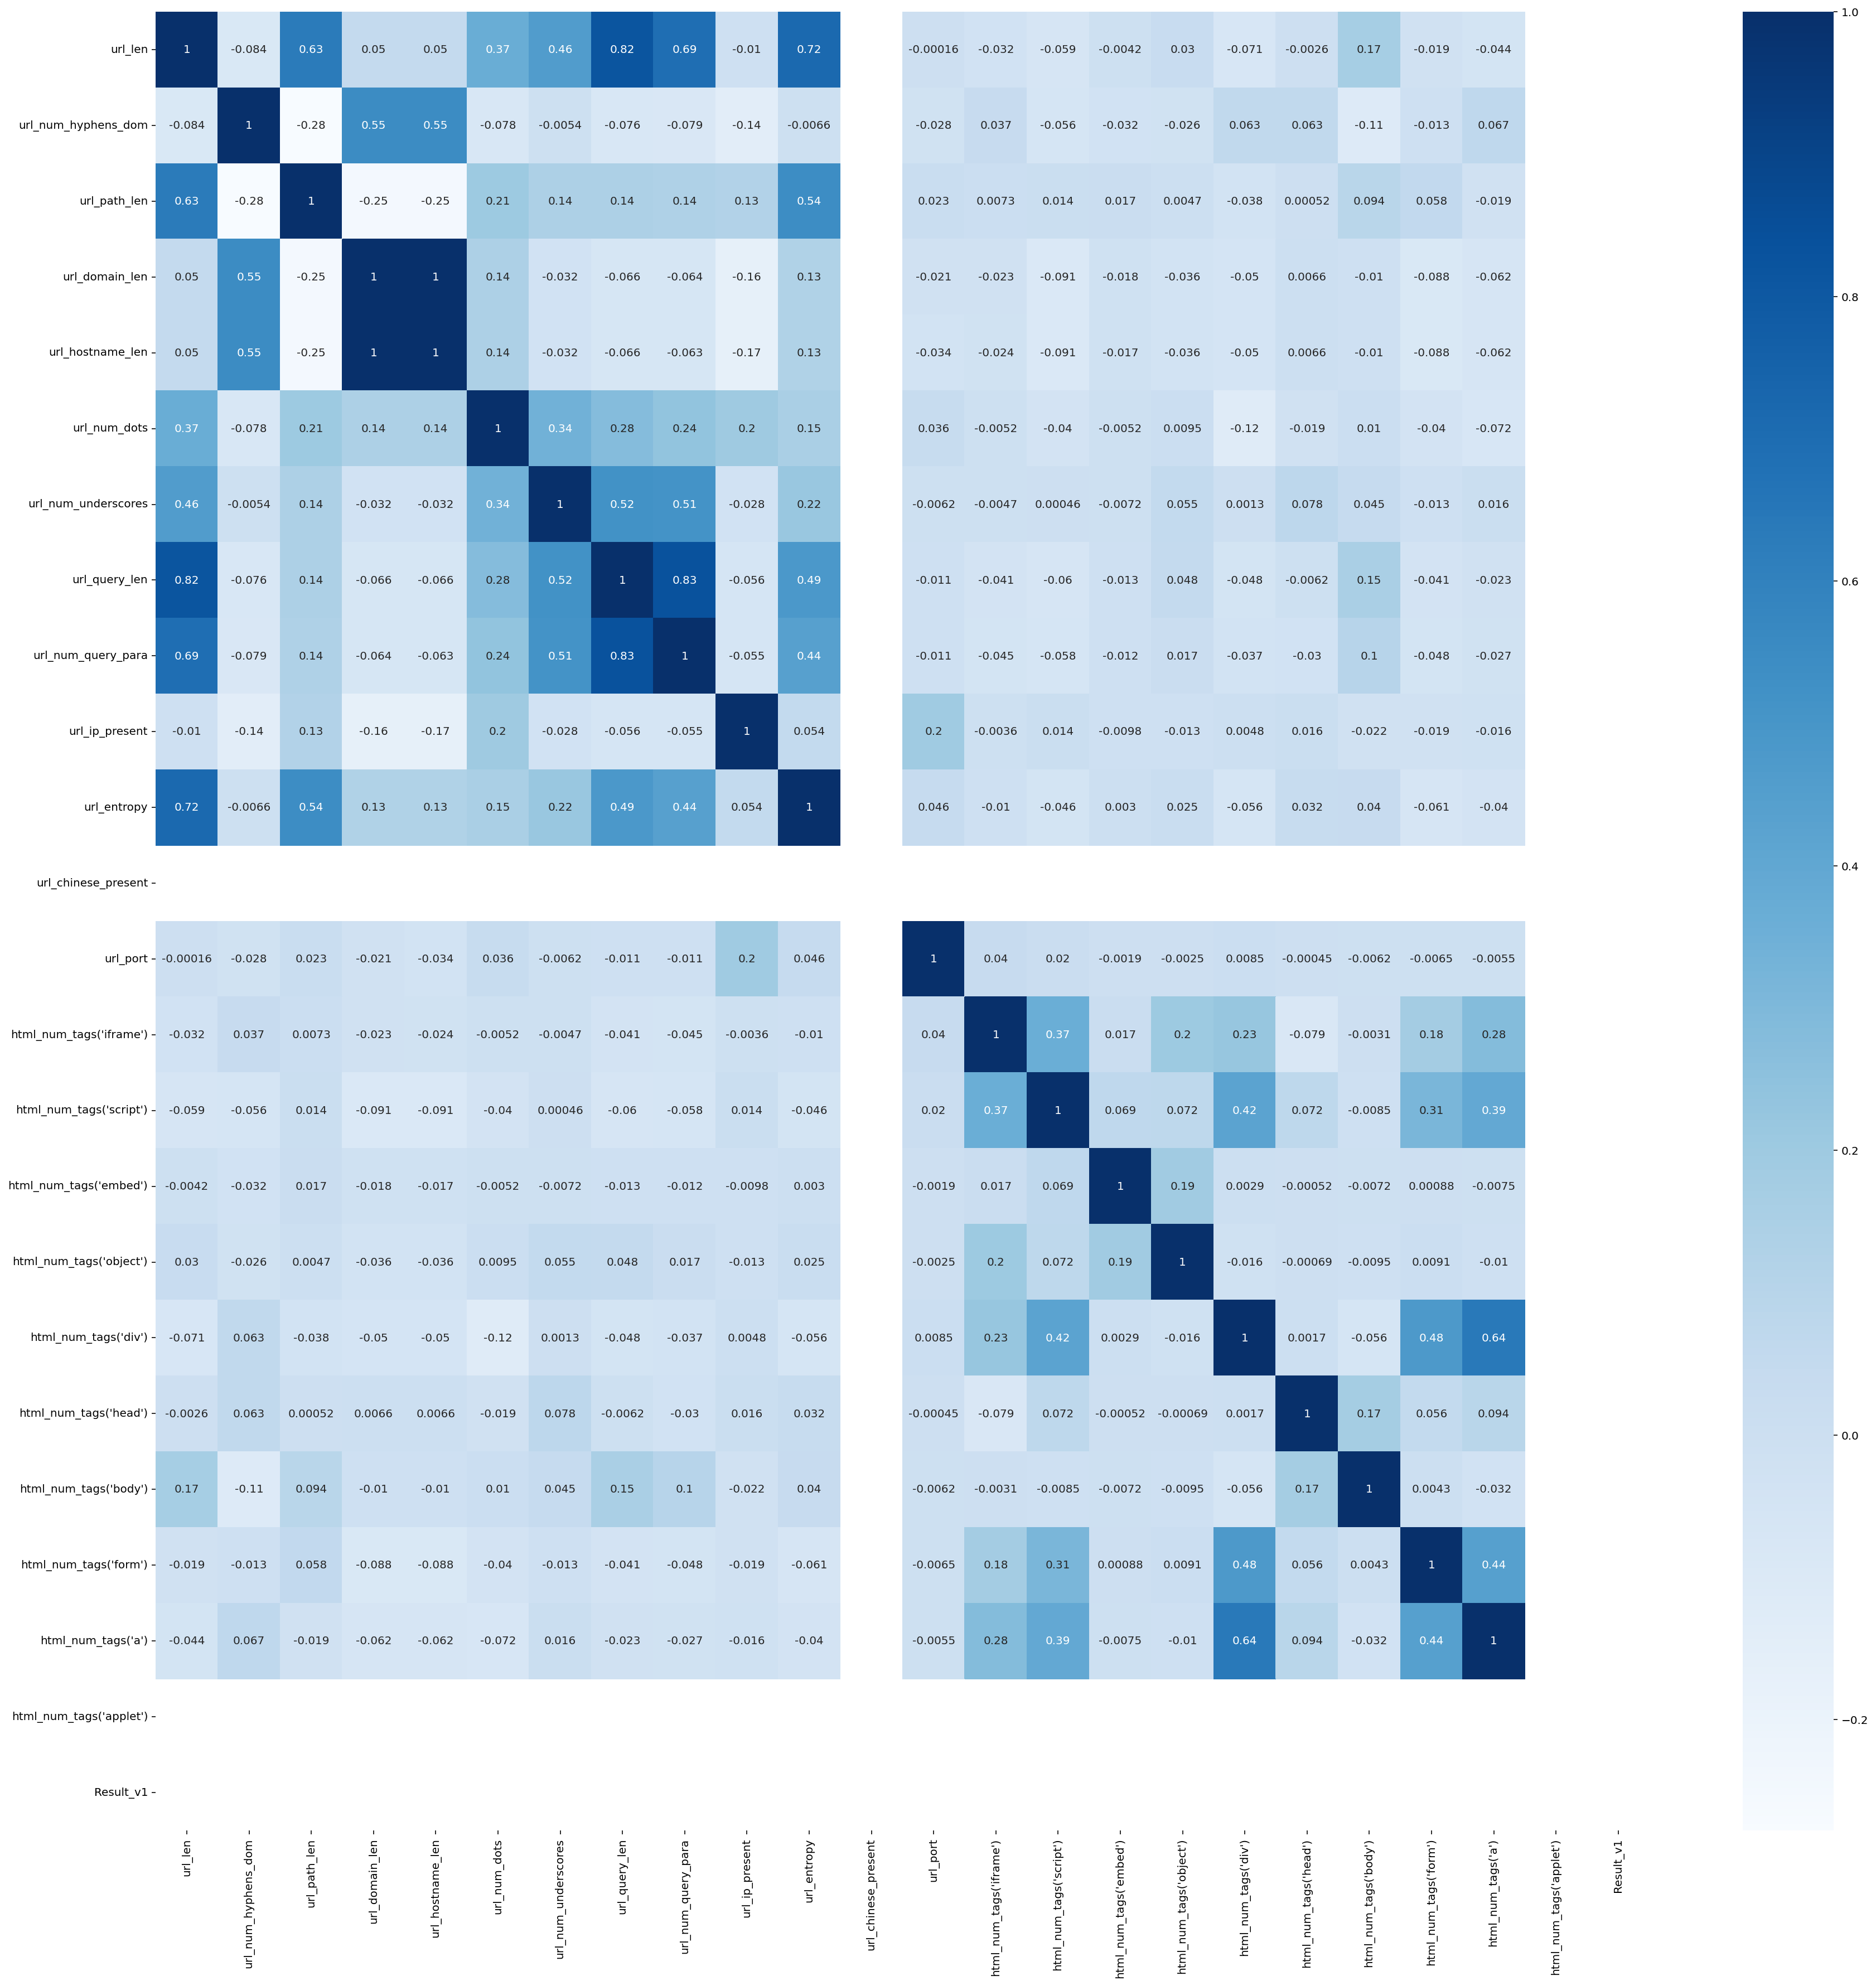

In [31]:
plt.figure(figsize=(30,30))
sns.heatmap(train_malicious_corr, annot=True, cmap='Blues')
plt.show()

- 원본 데이터 상관관계

In [32]:
total_corr = train.corr()

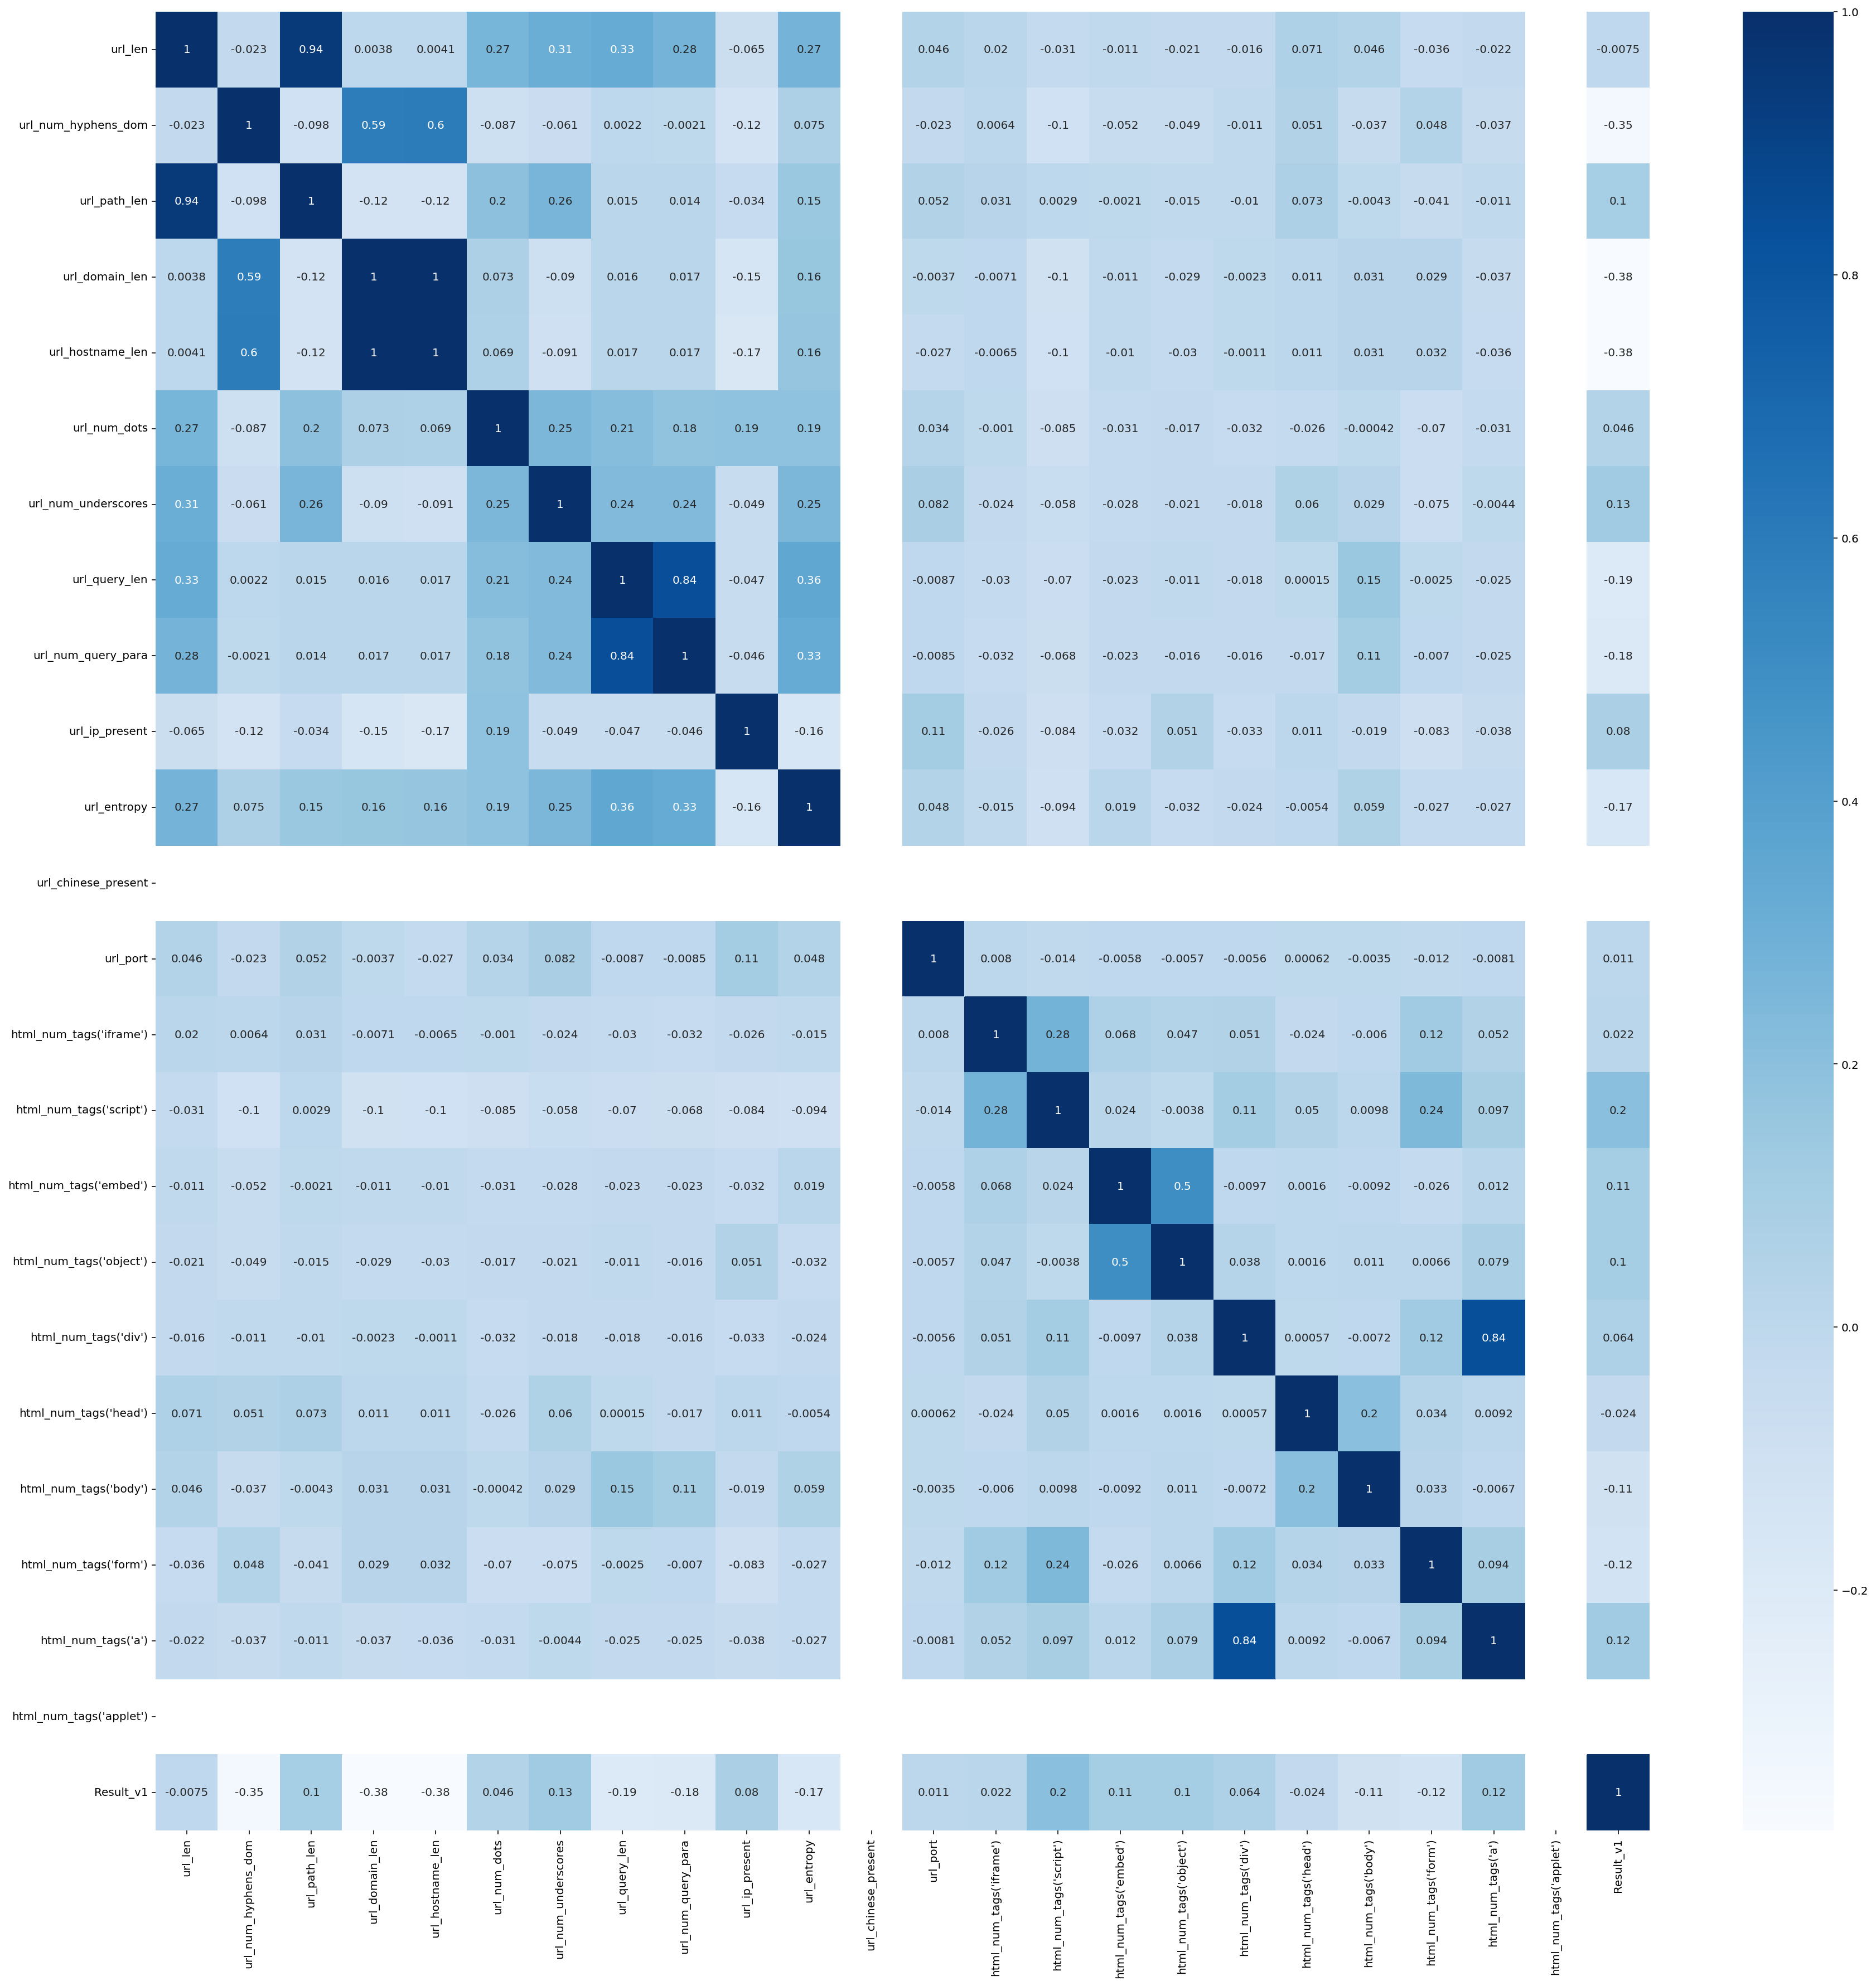

In [33]:
plt.figure(figsize=(30,30))
sns.heatmap(total_corr, annot=True, cmap='Blues')
plt.show()

- 시각화 결과 정상 데이터와 악성 데이터의 분포가 달라 학습하기 쉬울 거라 판단. 

### 2. 로지스틱 회귀분석 결과는 어떤지? 

- 귀무가설 : 각 feature는 target(Result_v1)에 영향을 주지 않는다. 
- 대립가설 : 각 feature는 target(Result_v1)에 영향을 준다. 

In [34]:
train.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_chinese_present', 'url_port', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('embed')',
       'html_num_tags('object')', 'html_num_tags('div')',
       'html_num_tags('head')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'Result_v1'],
      dtype='object')

In [35]:
# 로지스틱 회귀분석 p-value를 넣을 리스트 선언
result_total = []

In [36]:
train['Result_v1'].unique()

array([0, 1], dtype=int64)

In [12]:
train['Result_v1'] = train['Result_v1'].astype('category')

In [38]:
# url_num_hyphens_dom
model = sm.Logit(train['Result_v1'], train['url_num_hyphens_dom'])
result = model.fit()
result_total.append(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.632202
         Iterations 6


In [39]:
# url_len
model = sm.Logit(train['Result_v1'], train['url_len'])
result = model.fit()
result_total.append(result.pvalues)


Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2


In [40]:
# url_path_len
model = sm.Logit(train['Result_v1'], train['url_path_len'])
result = model.fit()
result_total.append(result.pvalues)

MissingDataError: exog contains inf or nans

In [ ]:

# url_domain_len
model = sm.Logit(train['Result_v1'], train['url_domain_len'])
result = model.fit()
result_total.append(result.pvalues)


In [ ]:
# url_hostname_len
model = sm.Logit(train['Result_v1'], train['url_hostname_len'])
result = model.fit()
result_total.append(result.pvalues)


In [ ]:
# url_num_dots
model = sm.Logit(train['Result_v1'], train['url_num_dots'])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
# url_num_underscores
model = sm.Logit(train['Result_v1'], train['url_num_underscores'])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
# url_query_len 
model = sm.Logit(train['Result_v1'], train['url_query_len'])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
# url_num_query_para
model = sm.Logit(train['Result_v1'], train['url_num_query_para'])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
# url_ip_present
model = sm.Logit(train['Result_v1'], train['url_ip_present'])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
# url_entropy
model = sm.Logit(train['Result_v1'], train['url_entropy'])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
# url_port
model = sm.Logit(train['Result_v1'], train['url_port'])
result = model.fit()

In [ ]:
# html_num_tags('script')
model = sm.Logit(train['Result_v1'], train["html_num_tags('script')"])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
# html_num_tags('embed')
model = sm.Logit(train['Result_v1'], train["html_num_tags('embed')"])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
# html_num_tags('object')
model = sm.Logit(train['Result_v1'], train["html_num_tags('object')"])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
# html_num_tags('div')
model = sm.Logit(train['Result_v1'], train["html_num_tags('div')"])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
# html_num_tags('head')
model = sm.Logit(train['Result_v1'], train["html_num_tags('head')"])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
# html_num_tags('body')
model = sm.Logit(train['Result_v1'], train["html_num_tags('body')"])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
# html_num_tags('form')
model = sm.Logit(train['Result_v1'], train["html_num_tags('form')"])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
# html_num_tags('a')
model = sm.Logit(train['Result_v1'], train["html_num_tags('a')"])
result = model.fit()
result_total.append(result.pvalues)

In [ ]:
result_total

- 95% 신뢰구간에서 p-value가 0.05 보다 작으면 대립가설을 채택한다.
- 따라서 target에 영향을 주지 않는 독립변수는 
    - url_len, url_query_len, url_num_query_para, url_entropy
    - html_num_tags('head'), html_num_tags('body')

In [ ]:
# # 결측치 대체 > 최빈값으로 대체 
# train['url_path_len'].fillna(train['url_path_len'].median(), inplace=True)
# train['url_domain_len'].fillna(train['url_domain_len'].median(), inplace=True)

# test['url_path_len'].fillna(test['url_path_len'].median(), inplace=True)
# test['url_domain_len'].fillna(test['url_domain_len'].median(), inplace=True)
# test['url_hostname_len'].fillna(test['url_hostname_len'].median(), inplace=True)
# test["html_num_tags('script')"].fillna(test["html_num_tags('script')"].median(), inplace=True)
# test["html_num_tags('form')"].fillna(test["html_num_tags('form')"].median(), inplace=True)
# test["html_num_tags('a')"].fillna(test["html_num_tags('a')"].median(), inplace=True)

In [13]:
# KNNimputer 
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

In [14]:
test.isna().sum()

url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_domain_len             466
url_hostname_len           463
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_chinese_present          0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
html_num_tags('applet')      0
dtype: int64

In [15]:
train_im = imputer.fit_transform(train)
test_im = imputer.fit_transform(test)

train = pd.DataFrame(train_im, columns = train.columns)
test = pd.DataFrame(test_im, columns = test.columns)

In [16]:
train.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [17]:
drop_2 = ['url_len', 'url_port']
train.drop(columns=drop_2, inplace=True, axis=1)
test.drop(columns=drop_2, inplace=True, axis=1)

In [18]:
print(train.shape, test.shape)

(3664, 22) (2441, 21)


### feature selection

In [20]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import *
from xgboost import XGBClassifier
from sklearn.metrics import *
from bayes_opt import BayesianOptimization
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb

In [21]:
# target 설정
target = 'Result_v1'

# x, y 분리
x = train.drop(target, axis=1)
y = train[target]

# 학습용, 평가용 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2022)

In [22]:
# 모델 선언1
model_xbg = XGBClassifier(random_state=2022, eval_metric='mlogloss', use_label_encoder=False)

# 모델 학습1
model_xbg.fit(x_train, y_train)
xgb_train_pred = model_xbg.predict(x_train)

xgb_test_pred = model_xbg.predict(test)

In [23]:
x_train['xgb_pred'] = xgb_train_pred.astype(int)

In [24]:
test['xgb_pred'] = xgb_test_pred.astype(int)

In [25]:
x_train

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),xgb_pred
3499,0.0,20.0,17.0,17.0,3.0,0.0,0.0,0.0,0.0,4.354223,...,17.0,0.0,0.0,32.0,1.0,1.0,2.0,29.0,0.0,1
3393,0.0,45.0,13.0,13.0,4.0,0.0,0.0,0.0,1.0,4.816116,...,1.0,0.0,0.0,60.0,1.0,1.0,1.0,18.0,0.0,0
1048,0.0,17.0,17.0,17.0,4.0,0.0,0.0,0.0,0.0,3.997200,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,1
2141,0.0,6.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,3.797903,...,9.0,0.0,0.0,18.0,1.0,1.0,1.0,58.0,0.0,1
2510,1.0,10.0,29.0,29.0,3.0,0.0,0.0,0.0,0.0,4.186424,...,2.0,0.0,0.0,41.0,1.0,1.0,1.0,18.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,0.0,16.0,13.0,13.0,2.0,0.0,271.0,7.0,0.0,4.932694,...,2.0,0.0,0.0,45.0,1.0,1.0,1.0,5.0,0.0,0
624,0.0,27.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,4.246365,...,10.0,0.0,0.0,19.0,1.0,1.0,1.0,0.0,0.0,0
173,2.0,0.0,25.0,25.0,2.0,0.0,0.0,0.0,0.0,4.054229,...,13.0,0.0,0.0,121.0,1.0,1.0,0.0,375.0,0.0,1
1244,0.0,79.0,17.0,17.0,3.0,0.0,0.0,0.0,0.0,4.770205,...,5.0,0.0,0.0,12.0,1.0,1.0,1.0,3.0,0.0,1


In [53]:
test

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),xgb_pred
0,0.0,80.0,17.0,17.0,4.0,0.0,0.0,0.0,0.0,4.844913,...,5.0,0.0,0.0,12.0,1.0,1.0,1.0,3.0,0.0,1
1,0.0,22.0,15.0,15.0,3.0,1.0,0.0,0.0,0.0,4.246157,...,27.0,0.0,0.0,158.0,1.0,1.0,2.0,182.4,0.0,1
2,0.0,24.4,20.0,20.0,3.0,3.0,0.0,0.0,0.0,4.612835,...,6.0,3.0,3.0,34.0,1.0,1.0,0.0,136.0,0.0,1
3,0.0,14.0,26.0,26.0,2.0,0.0,0.0,0.0,0.0,4.238521,...,1.2,0.0,0.0,29.0,1.0,1.0,1.0,2.0,0.0,0
4,2.0,17.2,26.0,26.0,2.0,0.0,0.0,0.0,0.0,4.240669,...,2.0,0.0,0.0,41.0,1.0,1.0,1.0,16.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,0.0,31.0,17.0,30.8,4.0,2.0,0.0,0.0,0.0,4.738082,...,18.0,0.0,0.0,79.0,1.0,1.0,1.0,119.0,0.0,1
2437,0.0,1.0,35.0,35.0,2.0,0.0,0.0,0.0,0.0,4.080351,...,27.0,0.0,0.0,57.0,1.0,1.0,1.0,11.4,0.0,0
2438,1.0,23.0,22.0,17.8,2.0,0.0,0.0,0.0,0.0,4.359443,...,8.0,0.0,0.0,199.0,1.0,1.0,2.0,84.4,0.0,1
2439,0.0,10.0,14.0,15.0,3.0,0.0,0.0,0.0,1.0,4.260333,...,3.0,0.0,0.0,90.0,1.0,1.0,2.0,25.0,0.0,0


In [26]:
from catboost import CatBoostClassifier

In [27]:
cat_model = CatBoostClassifier(random_state=2022, max_depth=13)
cat_model.fit(x_train,y_train)
y_pred = cat_model.predict(test)

Learning rate set to 0.016306
0:	learn: 0.6457516	total: 272ms	remaining: 4m 31s
1:	learn: 0.5927685	total: 282ms	remaining: 2m 20s
2:	learn: 0.5494398	total: 406ms	remaining: 2m 14s
3:	learn: 0.5079530	total: 469ms	remaining: 1m 56s
4:	learn: 0.4662436	total: 480ms	remaining: 1m 35s
5:	learn: 0.4292600	total: 487ms	remaining: 1m 20s
6:	learn: 0.3962501	total: 508ms	remaining: 1m 12s
7:	learn: 0.3670207	total: 525ms	remaining: 1m 5s
8:	learn: 0.3400208	total: 586ms	remaining: 1m 4s
9:	learn: 0.3113769	total: 732ms	remaining: 1m 12s
10:	learn: 0.2892243	total: 803ms	remaining: 1m 12s
11:	learn: 0.2694030	total: 926ms	remaining: 1m 16s
12:	learn: 0.2508885	total: 1.06s	remaining: 1m 20s
13:	learn: 0.2344183	total: 1.19s	remaining: 1m 24s
14:	learn: 0.2147157	total: 1.2s	remaining: 1m 18s
15:	learn: 0.1957583	total: 1.2s	remaining: 1m 13s
16:	learn: 0.1812912	total: 1.24s	remaining: 1m 11s
17:	learn: 0.1682683	total: 1.37s	remaining: 1m 14s
18:	learn: 0.1554029	total: 1.38s	remaining: 1m 

In [66]:
test

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),xgb_pred
0,0.0,80.0,17.0,17.0,4.0,0.0,0.0,0.0,0.0,4.844913,...,5.0,0.0,0.0,12.0,1.0,1.0,1.0,3.0,0.0,1
1,0.0,22.0,15.0,15.0,3.0,1.0,0.0,0.0,0.0,4.246157,...,27.0,0.0,0.0,158.0,1.0,1.0,2.0,182.4,0.0,1
2,0.0,24.4,20.0,20.0,3.0,3.0,0.0,0.0,0.0,4.612835,...,6.0,3.0,3.0,34.0,1.0,1.0,0.0,136.0,0.0,1
3,0.0,14.0,26.0,26.0,2.0,0.0,0.0,0.0,0.0,4.238521,...,1.2,0.0,0.0,29.0,1.0,1.0,1.0,2.0,0.0,0
4,2.0,17.2,26.0,26.0,2.0,0.0,0.0,0.0,0.0,4.240669,...,2.0,0.0,0.0,41.0,1.0,1.0,1.0,16.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,0.0,31.0,17.0,30.8,4.0,2.0,0.0,0.0,0.0,4.738082,...,18.0,0.0,0.0,79.0,1.0,1.0,1.0,119.0,0.0,1
2437,0.0,1.0,35.0,35.0,2.0,0.0,0.0,0.0,0.0,4.080351,...,27.0,0.0,0.0,57.0,1.0,1.0,1.0,11.4,0.0,0
2438,1.0,23.0,22.0,17.8,2.0,0.0,0.0,0.0,0.0,4.359443,...,8.0,0.0,0.0,199.0,1.0,1.0,2.0,84.4,0.0,1
2439,0.0,10.0,14.0,15.0,3.0,0.0,0.0,0.0,1.0,4.260333,...,3.0,0.0,0.0,90.0,1.0,1.0,2.0,25.0,0.0,0


In [67]:
x_train

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),xgb_pred
3499,0.0,20.0,17.0,17.0,3.0,0.0,0.0,0.0,0.0,4.354223,...,17.0,0.0,0.0,32.0,1.0,1.0,2.0,29.0,0.0,1
3393,0.0,45.0,13.0,13.0,4.0,0.0,0.0,0.0,1.0,4.816116,...,1.0,0.0,0.0,60.0,1.0,1.0,1.0,18.0,0.0,0
1048,0.0,17.0,17.0,17.0,4.0,0.0,0.0,0.0,0.0,3.997200,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,1
2141,0.0,6.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,3.797903,...,9.0,0.0,0.0,18.0,1.0,1.0,1.0,58.0,0.0,1
2510,1.0,10.0,29.0,29.0,3.0,0.0,0.0,0.0,0.0,4.186424,...,2.0,0.0,0.0,41.0,1.0,1.0,1.0,18.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,0.0,16.0,13.0,13.0,2.0,0.0,271.0,7.0,0.0,4.932694,...,2.0,0.0,0.0,45.0,1.0,1.0,1.0,5.0,0.0,0
624,0.0,27.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,4.246365,...,10.0,0.0,0.0,19.0,1.0,1.0,1.0,0.0,0.0,0
173,2.0,0.0,25.0,25.0,2.0,0.0,0.0,0.0,0.0,4.054229,...,13.0,0.0,0.0,121.0,1.0,1.0,0.0,375.0,0.0,1
1244,0.0,79.0,17.0,17.0,3.0,0.0,0.0,0.0,0.0,4.770205,...,5.0,0.0,0.0,12.0,1.0,1.0,1.0,3.0,0.0,1


In [ ]:
# 모델 선언
model_xbg = XGBClassifier(random_state=2022, eval_metric='mlogloss', use_label_encoder=False)

# 모델 튜닝
# 파라미터 선언
params = {'max_depth' : range(5, 20),
          'learning_rate' : [0.001, 0.01, 0.1, 0.3, 1]
         }

# 최적 cv값 지정
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=2022)

# Random Search 선언 
model = RandomizedSearchCV(cat_model,
                           params,
                           cv=kfold,
                           scoring='accuracy')

# 모델 학습
model.fit(x, y)

# 결과 예측
y_pred = model.predict(test)

## 최종 평가

In [ ]:
y_pred = y_pred.astype(int)

In [ ]:
y_pred_2 = pd.DataFrame(y_pred)
y_pred_2.replace({0:-1}, inplace=True)

In [ ]:
# 제출 양식 불러오기 
submission = pd.read_csv('sample_submission.csv')

# 예측 열 추가 
submission['expected']= y_pred_2

In [ ]:
# 확인
submission

In [ ]:
submission.to_csv("d023125_소다영.csv", index=None)